In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,regularizers,optimizers
from scipy.io import loadmat,savemat

c:\users\nived\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\nived\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\nived\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\nived\appd

In [5]:
#### Loading Data ######
g = np.loadtxt('Difference\\Cn2\\Again difference\\Againdiff_phasescreen_1.DAT',dtype = 'float')
f = np.loadtxt('Difference\\Cn2\\cn2_1.DAT',dtype = 'float')
for i in range(2,15):
    m = np.loadtxt('Difference\\Cn2\\Again difference\\Againdiff_phasescreen_'+str(i)+'.DAT',dtype = 'float')
    n = np.loadtxt('Difference\\Cn2\\cn2_'+str(i)+'.DAT',dtype ='float')
    g = np.concatenate((g,m))
    f = np.concatenate((f,n))
    print(np.shape(g))
#print(np.shape(g))
#for i in range(9,15):
#    m = np.loadtxt('Difference\\Cn2\\diff_phasescreen_'+str(i)+'.DAT',dtype = 'float')
#    n = np.loadtxt('Difference\\Cn2\\cn2_'+str(i)+'.DAT',dtype ='float')
#    g = np.concatenate((g,m))
#    f = np.concatenate((f,n))
#    print(np.shape(g))



KeyboardInterrupt: 

In [4]:
l=int(np.shape(g)[0]-1000);

m = g[l:len(g[:,1]),:]
n = f[l:len(f)]*1e16

g =g[0:l,:]
f =f[0:l]*1e16

print(np.shape(g))
print(np.shape(f))
print(np.shape(m))
print(np.shape(n))



NameError: name 'g' is not defined

In [5]:

f = np.log10(f)
n = np.log10(n)
print(f)

[1.35705233 0.90609509 1.02588117 ... 1.5434983  0.34701447 0.4494203 ]


In [6]:
f = f*100
n = n*100

In [23]:
print(f[20])

261.1336179741807


In [8]:
inputs1=keras.Input(shape=g[0].shape)

flat1=layers.Dense(1000,activation='linear')(inputs1)
#hidden0=layers.Dense(900,activation='linear')(flat1)
#drop0 = layers.Dropout(0.2)(hidden0)
hidden1=layers.Dense(800,activation='linear')(flat1)
drop1=layers.Dropout(0.1)(hidden1)
hidden2=layers.Dense(600,activation='relu')(drop1)
drop2=layers.Dropout(0.1)(hidden2)
hidden3=layers.Dense(300,activation='relu')(drop2)
drop3=layers.Dropout(0.1)(hidden3)
hidden4=layers.Dense(50,activation='relu')(drop3)
outputs1=layers.Dense(1,activation='relu')(hidden4)
model=keras.Model(inputs=inputs1,outputs=outputs1)
model.summary()


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10000)]           0         
_________________________________________________________________
dense (Dense)                (None, 1000)              10001000  
_________________________________________________________________
dense_1 (Dense)              (None, 800)               800800    
_________________________________________________________________
dropout (Dropout)            (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 600)               480600    
_________________________________________________________________
dropout_1 (Dropout)          (None, 600)               0         
_________

In [9]:
from tensorflow.keras import metrics, regularizers, optimizers
model.compile(optimizer=optimizers.Adam(lr = 0.001),loss='mse',metrics=['accuracy'])
history=model.fit(g,f,batch_size=128,validation_split=0.1,epochs=100)

Train on 62100 samples, validate on 6900 samples
Epoch 1/100
62100/62100 [==============================] - 154s 2ms/sample - loss: 5602.2105 - acc: 0.0000e+00 - val_loss: 3517.7869 - val_acc: 0.0000e+00
Epoch 2/100
62100/62100 [==============================] - 96s 2ms/sample - loss: 2384.9054 - acc: 0.0000e+00 - val_loss: 1360.0482 - val_acc: 0.0000e+00
Epoch 3/100
62100/62100 [==============================] - 84s 1ms/sample - loss: 1085.0846 - acc: 0.0000e+00 - val_loss: 1863.5196 - val_acc: 0.0000e+00
Epoch 4/100
62100/62100 [==============================] - 77s 1ms/sample - loss: 875.1442 - acc: 0.0000e+00 - val_loss: 836.1528 - val_acc: 0.0000e+00
Epoch 5/100
62100/62100 [==============================] - 78s 1ms/sample - loss: 752.7170 - acc: 0.0000e+00 - val_loss: 1390.7360 - val_acc: 0.0000e+00
Epoch 6/100
62100/62100 [==============================] - 88s 1ms/sample - loss: 722.9654 - acc: 0.0000e+00 - val_loss: 682.8682 - val_acc: 0.0000e+00
Epoch 7/100
62100/62100 [======

In [10]:
test_scores=model.evaluate(m,n,verbose=2)
print('Test loss:',test_scores[0])
print('Test accuracy:',test_scores[1])

1000/1000 - 1s - loss: 379.9891 - acc: 0.0000e+00
Test loss: 379.98909130859374
Test accuracy: 0.0


KeyError: 'accuracy'

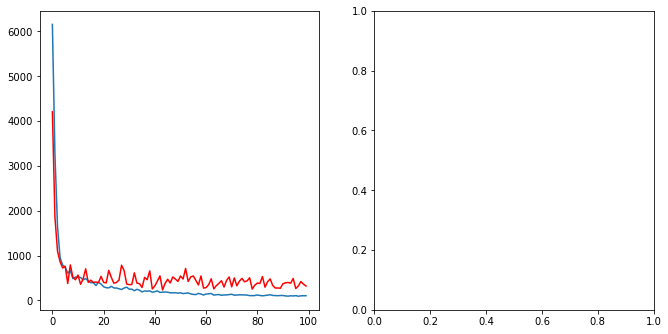

In [49]:
f1=plt.figure(figsize=[11,5.5])
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='r')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'],color='r')

In [11]:
predictions=model.predict(m)

In [12]:
predictions.shape
n.shape

(1000,)

[4.8783]
2.373691974684177


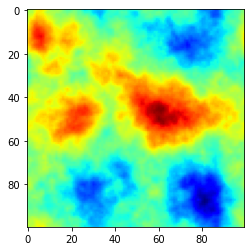

In [13]:
N = 999

print(predictions[N,:])
print(n[N])
phasescreen = np.zeros((100,100))
D = m[N,:]
for ii in range(100):
    phasescreen[ii,:] = D[ii*100:(ii+1)*100]
plt.imshow(phasescreen,cmap = 'jet')


In [14]:
model.save('55000s1000val_0.001lr_mse_100epoch_Cn2_llrrrr.h5')

In [16]:
#ii=0
#print(np.shape(predictions[ii,:]))
corr_r=np.zeros(1000)
#sum_t=np.zeros(500)
#sum_p=np.zeros(500)
from scipy.stats import pearsonr
#for ii in range(1000):
    #sum_t[ii]=sum(abs(n[ii]))
    #sum_p[ii]=sum(abs(predictions[ii])) 
corr_r= pearsonr(predictions[:,0],n)[0]



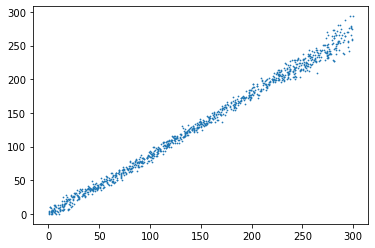

In [17]:

plt.scatter(n,predictions,s=0.5)

In [18]:
slope = np.polyfit(n,predictions,1)
print(slope)

[[ 0.90065173]
 [-1.60083949]]


In [54]:
import statistics
#print(statistics.mean(corr_r))
print((corr_r))

0.9962101283576564


In [55]:
for i in range (1000):
    print(predictions[i,0])
    print(n[i])
    print("\n")


74.10533
78.93190714472205


95.93382
101.58486764427188


93.00223
104.07756900056668


116.36232
132.44761882115608


60.669483
74.01701899576042


53.604416
55.04691640720729


163.26704
176.51123731701475


39.66327
43.98172772498743


43.40406
47.849759888469734


223.12195
248.56488670858727


9.777088
6.199222783871676


37.308983
52.19519966862336


12.490498
9.428193494859553


237.23515
254.79377244009544


215.92856
248.63834582112042


224.20454
251.6544309259281


96.343
117.44778618749656


45.20814
58.102284345030064


208.3416
228.593813245158


13.873215
15.075986079332


44.822647
51.31909846542548


215.94833
242.65919049874861


245.7551
282.67884430819447


4.3458405
6.1571158477200125


260.84827
295.47699778470485


201.23755
226.96620095250813


82.54578
92.69467015170854


80.86427
91.4319359828184


108.140305
116.76154358597034


90.57341
107.46032733398074


135.90857
155.01579219812652


198.67285
214.01234122976334


235.5657
245.84427042886023


80.68628


206.73196
222.0441956344356


215.47487
248.08855437198235


52.018543
56.763061030796536


32.96307
43.904336843384684


14.838178
11.51682112070365


11.590929
1.7550855872505284


60.58342
73.76892618628119


165.10605
182.60253458459843


231.63908
258.9018425871556


59.1418
81.07715418601114


62.00537
76.00815314022711


117.98538
132.52264850575486


45.994625
50.49774915078604


173.06725
197.39613428133822


162.07275
181.3716097368035


237.59425
268.3615820772584


143.42084
149.33676723969498


81.34183
93.35212493716368


211.66502
263.54248452921905


75.71585
91.08535200434211


191.26747
237.2812930629239


10.408452
4.536273911871187


33.582565
35.08914630218189


103.65918
117.05844120146232


188.18715
214.92317246245847


83.68077
97.2911499398112


176.64716
197.19293021649307


57.29967
66.3529344951911


24.565466
18.313626791501207


131.38695
146.74808678122773


89.64418
100.68830509154161


98.25566
100.70447373256198


181.31331
205.4099787435302


161.225



76.70569
85.95460359821132


209.97502
220.06484838860024


172.41002
192.8801544861109


81.158295
92.25366414943572


11.181343
15.330233933007879


37.507095
40.08435837468003


231.05269
246.0096883916968


24.322771
33.17345759154868


93.26947
99.42767943133806


119.32083
135.40898725123327


250.09763
280.2277121564998


53.60044
61.1780273765417


200.66833
223.16005615639386


208.40298
227.31531196940384


148.61345
165.71934437784


124.5831
137.80492417655063


182.749
200.03087217017548


185.4047
213.69283129595402


222.94658
240.3990008728332


208.86784
224.18866216821255


10.526974
1.5295399293538798


223.23907
242.40635983550814


239.02058
253.4323745521162


247.01483
261.5022312066305


124.59476
137.41968240949305


113.815704
121.87947335190294


101.887634
114.00336495613601


70.34919
72.19206380669797


20.314589
29.14502086023169


176.4711
199.81016288790556


240.07239
286.7567748552023


220.62251
231.8548662528082


22.327984
21.964569271536043


24

19.493308972914047
21.22016567515852


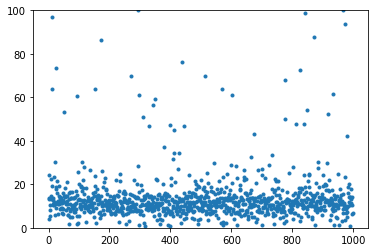

In [22]:
sm = 0
pe = np.zeros(1000)
ae = np.zeros(1000)
for i in range (1000):
    ae[i] = abs(predictions[i,0] - n[i])
    pe[i] = ae[i]/n[i]*100
    sm = sm + ae[i]**2
sm = sm/1000
mse = np.sqrt(sm)
print(mse)
plt.plot(pe,'.')
plt.ylim(0,100)
print(np.mean(pe))

In [68]:
error = (10**(mse/100))/1e16
print(error)

1.5179567297899445e-16


In [ ]:
phasescreen = np.zeros((100,100))
Dat_ff=m[N,:]
for ii in range(100):
    a=Dat_nf[ii*100:(ii+1)*100]
    #b=Dat_ff[ii*100:(ii+1)*100]
    #c=Dat_pr[ii*100:(ii+1)*100]
    
    phasescreen[ii,:]=a
    #recon_ff[ii,:]=b
    #recon_pr[ii,:]=c

In [88]:
mg = np.zeros(74000)
for i in range(74000):
    mg[i] = max(g[i])
    

In [82]:
mg = mg[0:73999]


In [95]:
inputs1=keras.Input(shape=1)

flat1=layers.Dense(1000,activation='linear')(inputs1)
#hidden0=layers.Dense(900,activation='linear')(flat1)
#drop0 = layers.Dropout(0.2)(hidden0)
hidden1=layers.Dense(800,activation='linear')(flat1)
drop1=layers.Dropout(0.1)(hidden1)
hidden2=layers.Dense(600,activation='relu')(drop1)
drop2=layers.Dropout(0.1)(hidden2)
hidden3=layers.Dense(300,activation='relu')(drop2)
drop3=layers.Dropout(0.1)(hidden3)
hidden4=layers.Dense(50,activation='relu')(drop3)
outputs1=layers.Dense(1,activation='relu')(hidden4)
model=keras.Model(inputs=inputs1,outputs=outputs1)
model.summary()


Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 1)]               0         
_________________________________________________________________
dense_88 (Dense)             (None, 1000)              2000      
_________________________________________________________________
dense_89 (Dense)             (None, 800)               800800    
_________________________________________________________________
dropout_47 (Dropout)         (None, 800)               0         
_________________________________________________________________
dense_90 (Dense)             (None, 600)               480600    
_________________________________________________________________
dropout_48 (Dropout)         (None, 600)               0         
_________________________________________________________________
dense_91 (Dense)             (None, 300)               180

In [96]:
from tensorflow.keras import metrics, regularizers, optimizers
model.compile(optimizer=optimizers.Adam(lr = 0.001),loss=tf.keras.losses.Huber(delta=0.01),metrics=['accuracy'])
history=model.fit(mg,f,batch_size=128,validation_split=0.2,epochs=100)

Train on 59200 samples, validate on 14800 samples
Epoch 1/100
59200/59200 [==============================] - 22s 372us/sample - loss: 0.8181 - acc: 0.0000e+00 - val_loss: 0.4202 - val_acc: 0.0000e+00
Epoch 2/100
59200/59200 [==============================] - 21s 352us/sample - loss: 0.7913 - acc: 0.0000e+00 - val_loss: 0.4207 - val_acc: 0.0000e+00
Epoch 3/100
59200/59200 [==============================] - 21s 358us/sample - loss: 0.7844 - acc: 0.0000e+00 - val_loss: 0.4069 - val_acc: 0.0000e+00
Epoch 4/100
59200/59200 [==============================] - 21s 348us/sample - loss: 0.7889 - acc: 0.0000e+00 - val_loss: 0.4154 - val_acc: 0.0000e+00
Epoch 5/100
59200/59200 [==============================] - 20s 344us/sample - loss: 0.7890 - acc: 0.0000e+00 - val_loss: 0.4041 - val_acc: 0.0000e+00
Epoch 6/100
59200/59200 [==============================] - 21s 349us/sample - loss: 0.7867 - acc: 0.0000e+00 - val_loss: 0.3994 - val_acc: 0.0000e+00
Epoch 7/100
59200/59200 [=========================

Epoch 55/100
59200/59200 [==============================] - 20s 336us/sample - loss: 0.7828 - acc: 0.0000e+00 - val_loss: 0.4106 - val_acc: 0.0000e+00
Epoch 56/100
59200/59200 [==============================] - 19s 319us/sample - loss: 0.7782 - acc: 0.0000e+00 - val_loss: 0.4117 - val_acc: 0.0000e+00
Epoch 57/100
59200/59200 [==============================] - 19s 318us/sample - loss: 0.7795 - acc: 0.0000e+00 - val_loss: 0.4103 - val_acc: 0.0000e+00
Epoch 58/100
59200/59200 [==============================] - 19s 319us/sample - loss: 0.7808 - acc: 0.0000e+00 - val_loss: 0.4049 - val_acc: 0.0000e+00
Epoch 59/100
59200/59200 [==============================] - 19s 317us/sample - loss: 0.7798 - acc: 0.0000e+00 - val_loss: 0.4107 - val_acc: 0.0000e+00
Epoch 60/100
59200/59200 [==============================] - 19s 319us/sample - loss: 0.7786 - acc: 0.0000e+00 - val_loss: 0.3861 - val_acc: 0.0000e+00
Epoch 61/100
59200/59200 [==============================] - 19s 319us/sample - loss: 0.7803 - 

In [97]:
test_scores=model.evaluate(mm,n,verbose=2)
print('Test loss:',test_scores[0])
print('Test accuracy:',test_scores[1])

1000/1000 - 0s - loss: 0.4141 - acc: 0.0000e+00
Test loss: 0.41405169343948367
Test accuracy: 0.0


KeyError: 'accuracy'

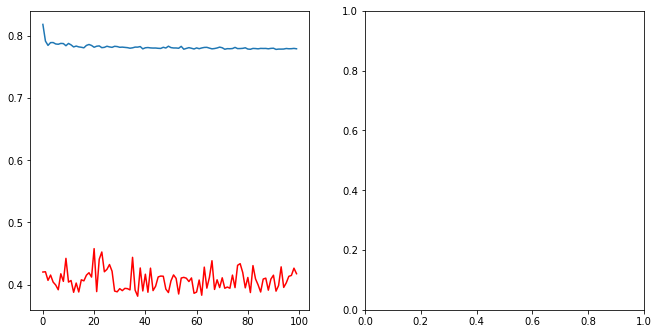

In [98]:
f1=plt.figure(figsize=[11,5.5])
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='r')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'],color='r')

In [100]:
predictions=model.predict(mm)

[1.7358737]
1.0561775203656893


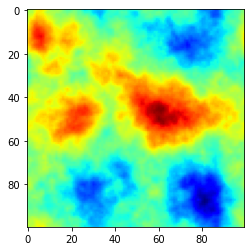

In [101]:
N = 999

print(predictions[N,:])
print(n[N])
phasescreen = np.zeros((100,100))
D = m[N,:]
for ii in range(100):
    phasescreen[ii,:] = D[ii*100:(ii+1)*100]
plt.imshow(phasescreen,cmap = 'jet')

In [102]:
model.save('7max5000s1000val_0.001lr_huber_100epoch_Cn2_llrrrr.h5')

In [103]:
#ii=0
#print(np.shape(predictions[ii,:]))
corr_r=np.zeros(1000)
#sum_t=np.zeros(500)
#sum_p=np.zeros(500)
from scipy.stats import pearsonr
for ii in range(500):
    #sum_t[ii]=sum(abs(n[ii]))
    #sum_p[ii]=sum(abs(predictions[ii])) 
    corr_r[ii]= pearsonr(predictions[:,0],n)[0]

In [104]:
import statistics
print(statistics.mean(corr_r))
print(max(corr_r))

0.4622362302350593
0.9244724604701186
